In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
player = 'Roger Federer'
df = pd.read_csv('https://github.com/ipython-books/'
                 'cookbook-2nd-data/blob/master/'
                 'federer.csv?raw=true',
                 parse_dates=['start date'],
                 dayfirst=True)

In [4]:
print(f"Number of columns: {len(df.columns)}")
df[df.columns[:4]].tail()

Number of columns: 70


,year,tournament,start date,type
1174,2012,"Australian Open, Australia",2012-01-16,GS
1175,2012,"Doha, Qatar",2012-01-02,250
1176,2012,"Doha, Qatar",2012-01-02,250
1177,2012,"Doha, Qatar",2012-01-02,250
1178,2012,"Doha, Qatar",2012-01-02,250


<AxesSubplot:xlabel='player1 total points won', ylabel='Count'>

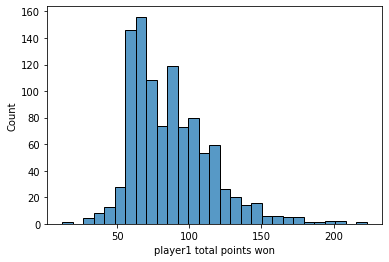

In [11]:
sns.histplot(df['player1 total points won'])

<AxesSubplot:xlabel='player1 aces', ylabel='Count'>

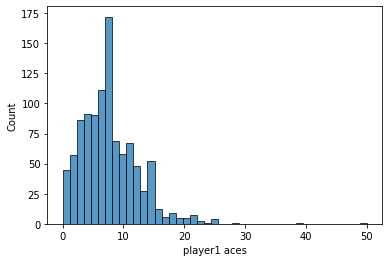

In [6]:
sns.histplot(df['player1 aces'])

In [14]:
df_bis = pd.DataFrame({'points': df['player1 total points won']/df['player1 total points total'],
                       'aces': df['player1 aces']/df['player1 total points total']}).dropna()
df_bis.tail()

,points,aces
1173,0.585366,0.024390
1174,0.471014,0.039855
1175,0.639535,0.046512
1176,0.606061,0.020202
1177,0.531792,0.069364


In [15]:
df_bis.corr()

,points,aces
points,1.000000,0.255457
aces,0.255457,1.000000


In [16]:
df_bis['result'] = (df_bis['points'] >
                    df_bis['points'].median())
df_bis['manyaces'] = (df_bis['aces'] >
                      df_bis['aces'].median())

In [18]:
A = pd.crosstab(df_bis['result'], df_bis['manyaces'])
st.chi2_contingency(A)


(27.809858855369555,
 1.338423379963363e-07,
 1,
 array([[257.25024343, 256.74975657],
        [256.74975657, 256.25024343]]))

p-value = 1.338423379963363e-07 which is less then 0.05 -> reject null hypothesis (independence) => there is a dependence between two variables